# Predicting heart-disease using machine learning

This notebook looks into using various machine learning and Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting if a patient has a heart disease

steps that would be taken:
1. Problem definition
2. Data 
3. Evaluation
4. features
5. Modelling
6. Experimentation

## 2. Data
The original data came from the cleveland data from the uci machine learning repository.

## 3. Evaluation
> If i can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in the data.
**create a data dictionary** 

* ageage in years
* sex(1= male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs (fasting blood sugar > 120mg/dl) (1=true; 0=false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by excercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7=reversible defect
* target1 or 0

## Preparing the tools 


In [1]:
#import all the tools i need

#regular exploratory data analysis  and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
#makes our plots to show in the notebook

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data 

In [2]:
df = pd.read_csv('7.1 heart-disease.csv')
df.shape  #size of data frame in rows and columns

(303, 14)

## Data exploration (exploratory data analysis)

The goal here is to find out more about the data

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing from the data and how do we deal with it?
4. Where are the outliers and why shoiuld you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail() #view bottom of table

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts() #check the number of each target

1    165
0    138
Name: target, dtype: int64

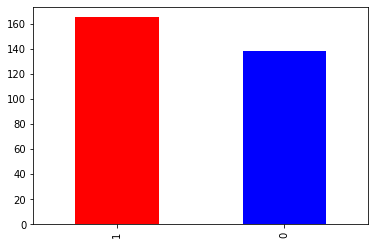

In [7]:
df['target'].value_counts().plot(kind='bar', color=['red', 'blue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum() #find sum of columns with missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
#Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


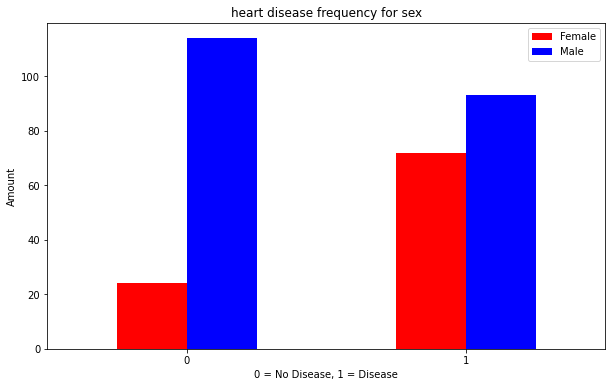

In [19]:
#create a plot for the crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['red', 'blue']);
plt.title('heart disease frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0); #xticks makes the labels under not to rotate, you can try without it and see the outcome

In [20]:
pd.crosstab(df.target, df.chol)

chol,126,131,141,149,157,160,164,166,167,168,...,341,342,353,354,360,394,407,409,417,564
target,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,1,1,1,0,...,1,0,1,0,0,0,1,1,0,0
1,1,0,1,1,1,1,0,0,0,1,...,0,1,0,1,1,1,0,0,1,1


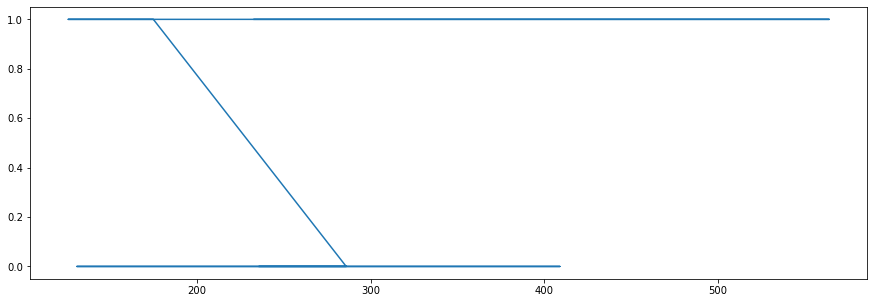

In [72]:
#practice 
fig, ax = plt.subplots(figsize=(15,5))   
ax.set()
ax.plot(df.chol, df.target)

<AxesSubplot:>

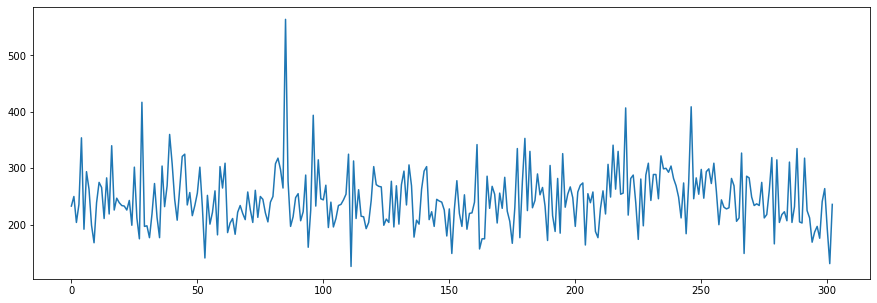

In [44]:
df.chol.plot(kind='line', figsize=(15,5))

In [54]:
df.sex(0).value_counts()

TypeError: 'Series' object is not callable

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs max heartrate for heart disease

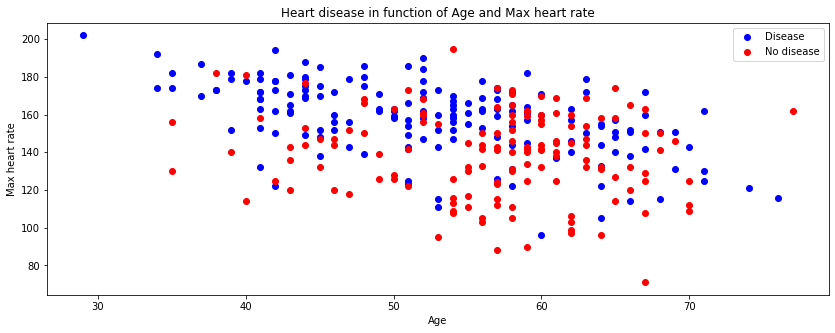

In [81]:
#create another figure 
plt.figure(figsize=(14,5))

#scatter plot where the target equals 1
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='blue')

#scatter plot where the target equals 0
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='red')

#add more descriptive info
plt.title('Heart disease in function of Age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No disease']);

<AxesSubplot:ylabel='Frequency'>

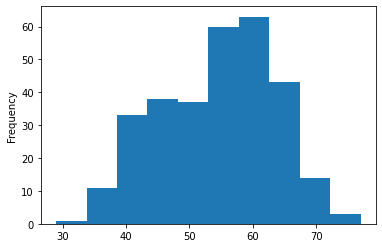

In [82]:
#check distribution of the age column with a histogram
df.age.plot.hist()

### Heart disease Frequency per chest pain type
cp = chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms(non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [83]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


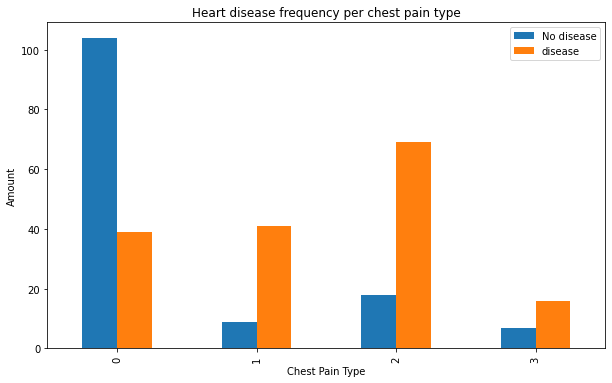

In [85]:
#visualize the crosstab above
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6))

plt.title("Heart disease frequency per chest pain type")
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease', 'disease']);

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


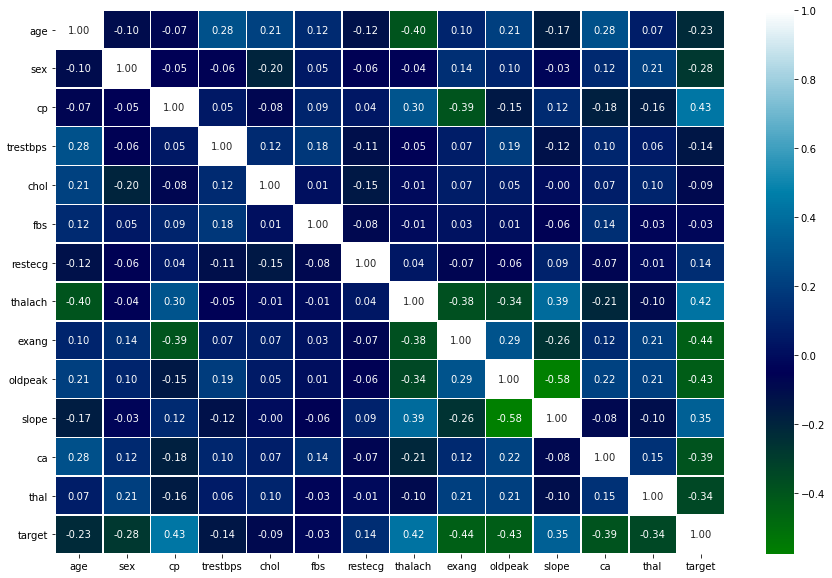

In [89]:
#visualize the correlation matrix with seaborn
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt='.2f',
                cmap='ocean')

## Modelling

In [90]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
#split data into x and y ie features and labels 
x = df.drop('target',axis=1)
y = df['target']

In [94]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [95]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [96]:
#split data into training and test set
np.random.seed(42)
x_train, x_test, y_train,y_test =train_test_split(x, y,
                                                 test_size=0.2)


In [97]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


## Building the machine learning model :
Im going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest neighbours classifier
3. Random Forest Classifier

In [99]:
#put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#create a function to fit and score the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dictionary of differnt scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [102]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

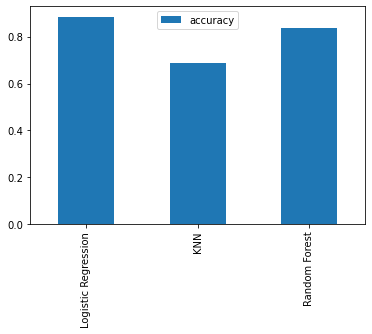

In [108]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

There is a baseline model but the models first prediction isnt always what we should base our next steps off.

 I need to work toward the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [110]:
#tuning KNearest neighbor

train_scores = []
test_scores = []

#create a list of different values for n_neighbors
neighbors = range(1, 21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [111]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [112]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


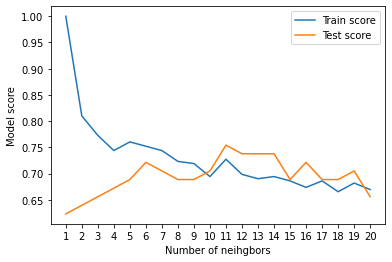

In [117]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neihgbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV
Im going to tune :
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [137]:
#create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4,4,20),
               'solver': ['liblinear']}

#create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,20,2)}

Now i have hyperparameter grids setup for each of my models, i would proceed to tune them with RandomizedSearchCV

In [133]:
#Tune LogisticRegression

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [134]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [135]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

I have tuned teh LogisticRegression(), i'll do the same for RandomForestClassifier()

In [138]:
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [139]:
#find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [140]:
#evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

In [141]:
#check if the model is improved
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## hyperparameter tuning with GridSearchCV

Since the LogisticRegression model provides the best scores so far, i'll try and improve them again using GridSearchCV.

In [147]:
#different hyperparameters for the logisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

#setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

#fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)/

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [148]:
#check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [149]:
#evaluate the grid search logisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# evaluating the tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification Report 
* Precision
* Recall
* F1-score

Also using cross validation where possible

To make comparisons and evaluate the trained model, i need to make predictions

In [151]:
#make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [152]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [153]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

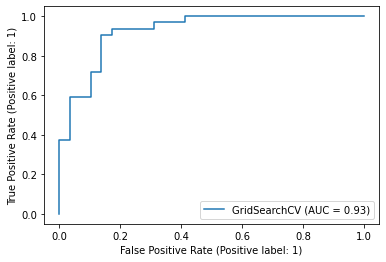

In [154]:
#plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [156]:
#confussion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


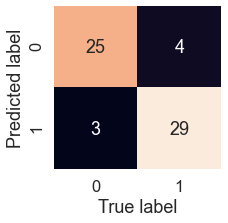

In [158]:
#make a function for a diagram for the confussion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plot a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)
    

Classification report

In [159]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

i'll calculate precison, recall and f1 score of my model using cross-validation and to do so i'll be using `cross_val_score()`

In [160]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [161]:
#create a new classifier with the best hyperparameters
clf = LogisticRegression(C= 0.20433597178569418,
                        solver = 'liblinear')

In [164]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [167]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [190]:
#cross validated precision
cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision= np.mean(cv_precision)
cv_precision

0.8207936507936507

In [191]:
#cross validated recall 
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [192]:
#cross validated f1 score
cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

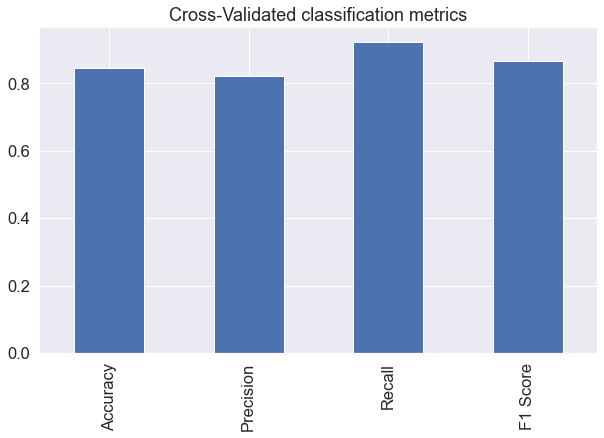

In [196]:
#visualization of my cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1 Score': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated classification metrics',
                     legend=False, figsize=(10,6));

### Feature Importance
Feature importance is finding out the features or independent variables that contibute the most to the outcome of the model and how they contribute.

Finding feature importance is different for each machine learning model

In [197]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [198]:
#fit a logistic regression
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [200]:
#check coef(coefficient or correlation)
clf.coef_

array([[ 0.00316728, -0.86044655,  0.66067042, -0.01156993, -0.00166374,
         0.04386109,  0.31275847,  0.02459361, -0.60413083, -0.56862804,
         0.4505163 , -0.63609898, -0.67663378]])

In [201]:
#matching the coef's of features to the dataframe's columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672809701328098,
 'sex': -0.8604465542018854,
 'cp': 0.6606704161071124,
 'trestbps': -0.011569931839584581,
 'chol': -0.0016637442846940298,
 'fbs': 0.043861090099753856,
 'restecg': 0.3127584688139112,
 'thalach': 0.024593614036076978,
 'exang': -0.6041308274033194,
 'oldpeak': -0.5686280446250761,
 'slope': 0.45051629703183155,
 'ca': -0.6360989766185763,
 'thal': -0.6766337834775279}

<AxesSubplot:title={'center':'Feature Importance'}>

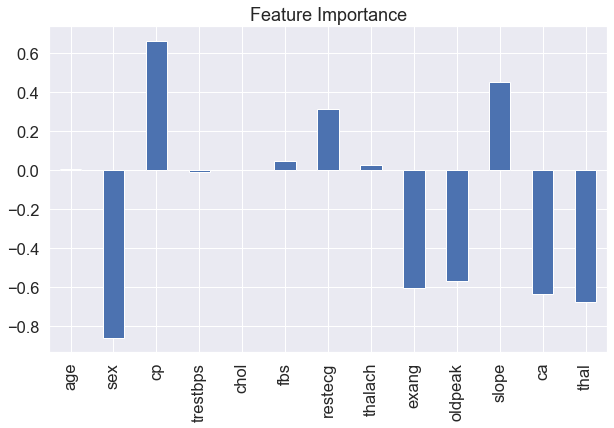

In [204]:
#make a plot to visualize the coef_ ie how much each of the features contribute to the label
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False, figsize=(10,6))

## Experimentation

Since i have not hit the evaluation metric of 95%, which of the following should i do?
* Collect more data
* Try a better model like CatBoost or XGBoost
* Is there a way to improve the current model?

## The final model scores are : Accuracy=0.8446994535519124, Recall=0.9212121212121213, F1 Score=0.8673007976269721